In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import copy
import datetime

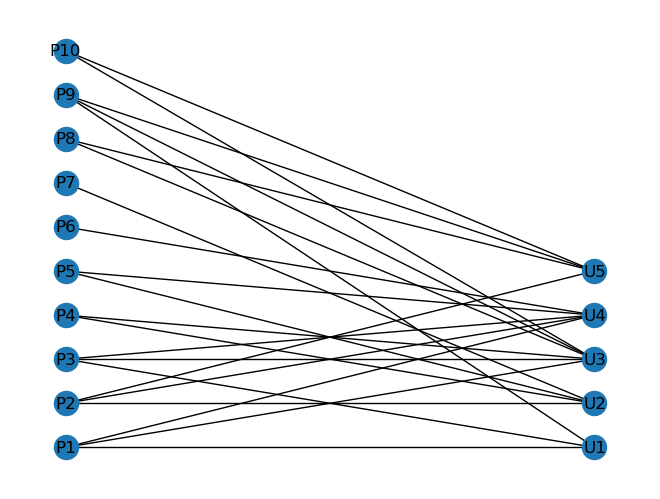

In [2]:
# Create a bipartite graph
B = nx.Graph()

# Adding nodes for Wikipedia pages (wp1, wp2, ...) and users (user1, user2, ...)
num_pages = 10
num_users = 5
pages = ['P' + str(i) for i in range(1, num_pages + 1)]
users = ['U' + str(i) for i in range(1, num_users + 1)]

B.add_nodes_from(pages, bipartite=0) # Add the Wikipedia page nodes
B.add_nodes_from(users, bipartite=1) # Add the user nodes

# Add edges between pages and users to simulate edits
for page in pages:
    for user in users:
        if random.random() > 0.5:  # Randomly deciding if a user edits a page
            B.add_edge(page, user)

# Plot the graph
pos = {node: [0, i] for i, node in enumerate(pages)}
pos.update({node: [1, i] for i, node in enumerate(users)})
nx.draw(B, pos, with_labels=True)
plt.show()

In [4]:
# Introduce Temporal Bias
# For simplicity, let's assume each edge has a timestamp attribute

start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 12, 31)
delta = datetime.timedelta(days=1)

current_date = start_date
while current_date <= end_date:
    for page in pages:
        for user in users:
            # Increase the probability of edits during a specific period (e.g., mid-year)
            if current_date.month == 6 and random.random() > 0.3:
                B.add_edge(page, user, date=current_date)
            elif random.random() > 0.7:
                B.add_edge(page, user, date=current_date)
    current_date += delta

# Introduce User Activity Bias
# Certain users (e.g., user1 and user2) make more edits
for _ in range(100):
    B.add_edge(random.choice(pages), 'U1', date=random.choice([start_date, end_date]))
    B.add_edge(random.choice(pages), 'U2', date=random.choice([start_date, end_date]))


In [5]:
# As an example, let's implement a simple downsampling technique
# Remove some edges from highly active users to reduce user activity bias
# Assuming 'U1' and 'U2' are the IDs of highly active users
highly_active_users = ['U1', 'U2']

# Find edges to remove
edges_to_remove = [(u, v) for u, v in B.edges() if u in highly_active_users or v in highly_active_users]

B_corrected = B
# Remove some edges randomly to reduce user activity bias
for edge in edges_to_remove:
    if random.random() > 0.5:  # Randomly decide whether to remove the edge
        B_corrected.remove_edge(*edge)

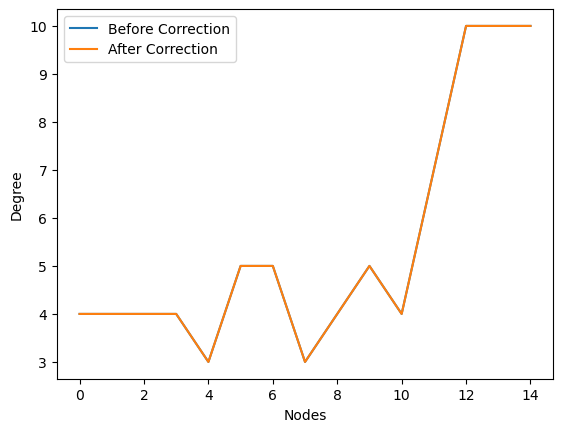

In [6]:
# Example: Compare the degree of nodes before and after bias correction
degrees_before = dict(B.degree())
# ... [Apply Bias Correction Methods Here] ...
degrees_after = dict(B_corrected.degree())

# Compare and plot the results
import matplotlib.pyplot as plt

plt.plot(list(degrees_before.values()), label='Before Correction')
plt.plot(list(degrees_after.values()), label='After Correction')
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.legend()
plt.show()


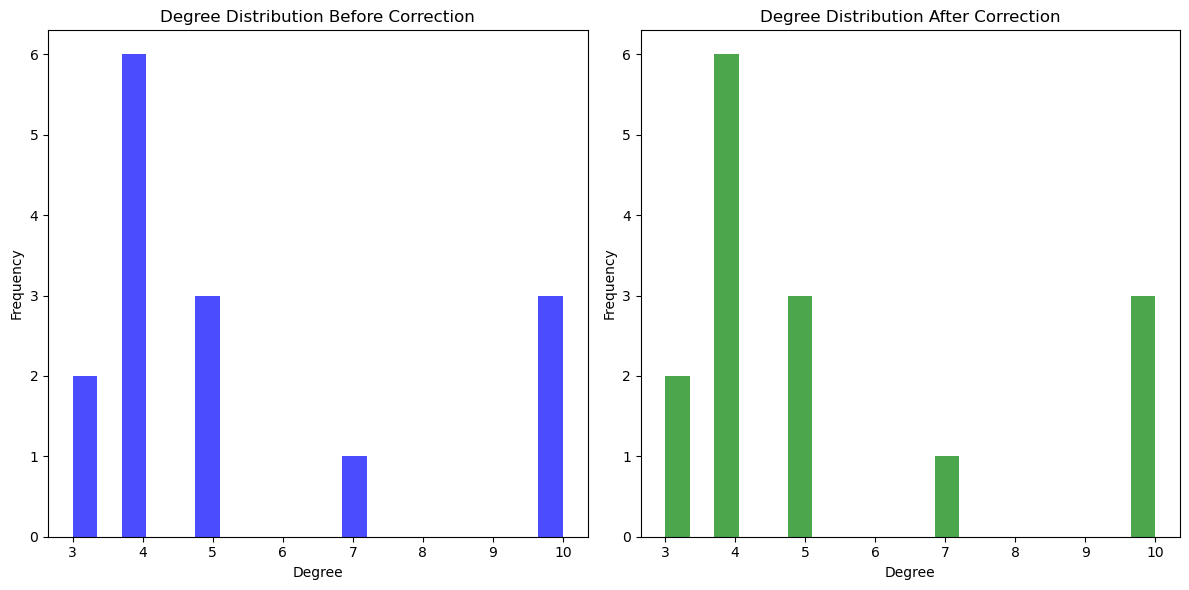

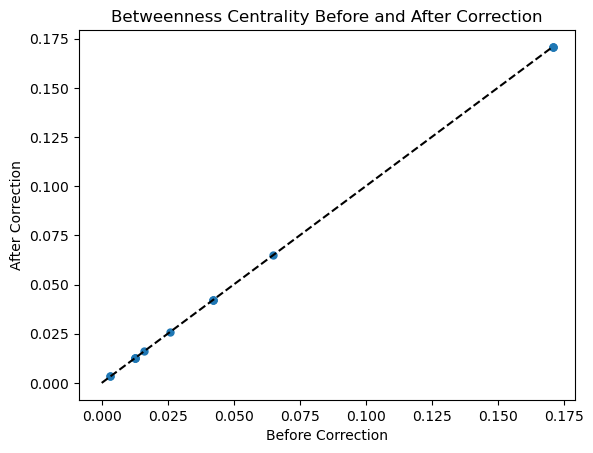

In [7]:
# Assuming 'B' is your bipartite graph after applying bias correction methods

# 1. Evaluate Change in Degree Distribution
degrees_before = [B.degree(n) for n in B.nodes()]  # Assuming you stored the original degrees
degrees_after = [B_corrected.degree(n) for n in B_corrected.nodes()]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(degrees_before, bins=20, color='blue', alpha=0.7, label='Before Correction')
plt.title('Degree Distribution Before Correction')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(degrees_after, bins=20, color='green', alpha=0.7, label='After Correction')
plt.title('Degree Distribution After Correction')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Evaluate Change in Network Centrality Measures
# For instance, let's look at the Betweenness Centrality
centrality_before = nx.betweenness_centrality(B)  # Assuming you stored the original centrality
centrality_after = nx.betweenness_centrality(B_corrected)

# Comparing centrality measures
centralities = np.array([(centrality_before[n], centrality_after[n]) for n in B.nodes()])
plt.plot(centralities[:, 0], centralities[:, 1], 'o', markersize=5)
plt.title('Betweenness Centrality Before and After Correction')
plt.xlabel('Before Correction')
plt.ylabel('After Correction')
plt.plot([0, max(centralities[:, 0])], [0, max(centralities[:, 0])], 'k--')  # Diagonal line for reference
plt.show()


**Degree Distribution Comparison:** This part of the code compares the degree distribution of the nodes in our bipartite graph before and after bias correction. A significant change in the distribution would indicate the impact of your bias correction methods.

Network Centrality Measure : The code compares betweenness centrality before and after bias correction. Betweenness centrality is a measure of the extent to which a node lies on paths between other nodes. Changes in this metric can indicate how the bias correction has affected the influence of individual nodes.